# Ejercicios Tema 4: Matplotlib-Pyplot

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ejercicio-3:-Subplots-y-gráficos-bonitos" data-toc-modified-id="Ejercicio-3:-Subplots-y-gráficos-bonitos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ejercicio 3: Subplots y gráficos bonitos</a></span></li><li><span><a href="#Ejercicio-13:-Representación-2D" data-toc-modified-id="Ejercicio-13:-Representación-2D-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ejercicio 13: Representación 2D</a></span></li></ul></div>

## Ejercicio 3: Subplots y gráficos bonitos

In [1]:
print('Running initialization')


# Configuramos el notebook para que enseñe todos los resultados evaluados en una celda
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'retina'  # gráficos en alta resolución

# Magic command for making plots interactive (zoomable): select one
#%matplotlib notebook
%matplotlib inline

#Configure graphics
from matplotlib import rcParams
rcParams['savefig.dpi'] = 200
#rcParams['figure.dpi'] = 200
#rcParams['figure.figsize'] = [3,2]

# to display animations in jupyter
from IPython.display import HTML  

# pretty print
from pprint import pprint

# Advanced math
import numpy as np

# Advanced graphics
import matplotlib.pyplot as plt

print('Initialization done')

Running initialization
Initialization done


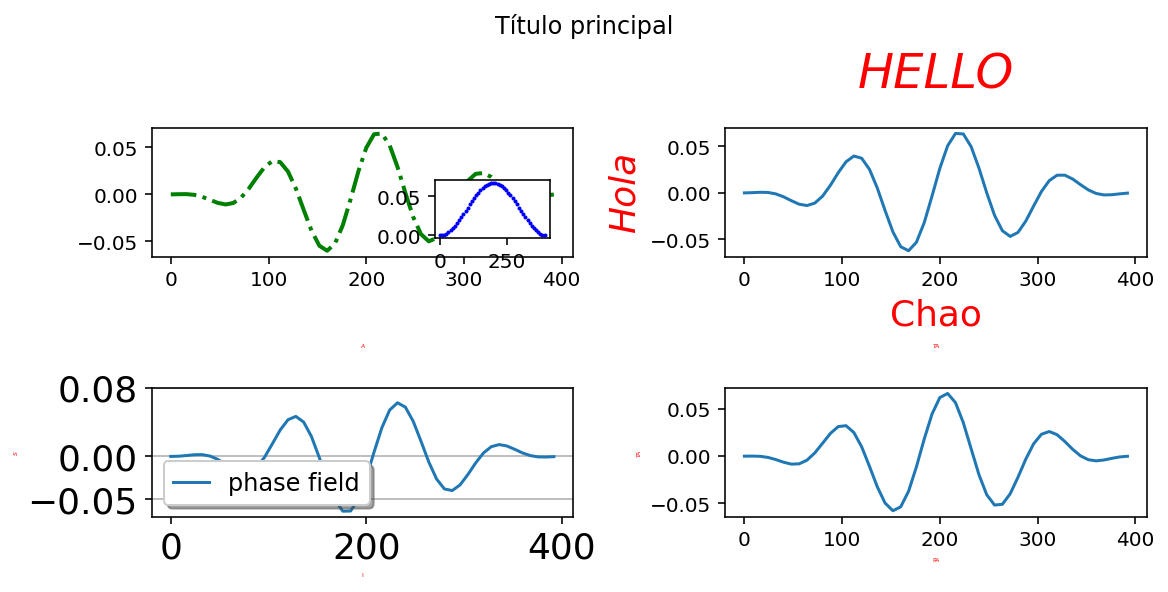

In [3]:
def campo(fase): # Función para el campo E
    """
        Función campo E
        
        Parameters
        ----------
        fase: float
            elemento que se suma al campo
 
        Returns
        -------
        float
            y: valor del campo E para un x
        """
    e0=0.067 #constante. Amplitud máxima del campo
    w=0.057 #contante. Frecuencia angular
    tp=400 #Tiempo que corresponde a los ciclos la longitud del pulso en periodos de la frecuencia 𝜔
    y=e0*(np.sin((np.pi*x)/tp)**2)*np.sin(w*x+fase)
    return y

def envolvente(fase): # Función para el campo E
    """
        Función envolvente E
        
        Parameters
        ----------
        fase: float
 
        Returns
        -------
        float
            y: valor de la envolvente para un x
        """
    e0=0.067 #constante. Amplitud máxima del campo
    tp=400 #Tiempo que corresponde a los ciclos la longitud del pulso en periodos de la frecuencia 𝜔
    y=e0*(np.sin((np.pi*x)/tp)**2)
    return y

ndx=50
x= np.linspace(0,400,ndx, endpoint=False)
y1=campo(2)
y2=campo(np.pi/4)
y3=campo(np.pi/2)
y4=campo(3*np.pi/4)
y11=envolvente(2)

fig, ax=plt.subplots(2,2, constrained_layout=True, figsize=(8,4))
fig.suptitle('Título principal')

ax[0,0].plot(x, y1,linewidth=2, linestyle='-.', color= 'green')
ax[0,0]=fig.add_axes([0.37,0.6,0.1,0.1]) #ax es el objeto gráfica (left, bottom, width, height)
ax[0,0].plot(x, y11, linewidth=0.0, color= 'blue', marker='o', markersize=1)

ax[1,0].plot(x, y2)
ax[0,1].plot(x, y3)
ax[1,1].plot(x, y4)

ax[1,1].set_xlabel('PA', fontsize=3, color='red');
ax[1,1].set_ylabel('TA', fontsize=3, fontstyle='italic', color='red');
ax[1,1].set_title('TA',fontsize=3, pad=20,fontstyle='italic', color='red');

ax[1,0].set_xlabel('I', fontsize=3, color='red');
ax[1,0].set_ylabel('S', fontsize=3, fontstyle='italic', color='red');
ax[1,0].set_title('A',fontsize=3, pad=20,fontstyle='italic', color='red');

ax[0,1].set_xlabel('Chao', fontsize=18, color='red');
ax[0,1].set_ylabel('Hola', fontsize=18, fontstyle='italic', color='red');
ax[0,1].set_title('HELLO',fontsize=24, pad=20,fontstyle='italic', color='red');

ax[1,0].set_xticks([], minor=True);
ax[1,0].set_yticks([-0.05,0,0.08]);
ax[1,0].tick_params(axis='both', labelsize=18)
ax[1,0].grid(axis='y');
ax[1,0].legend(('phase field', 'level set', 'sharp interface','hh'),
           shadow=True, loc='lower left', handlelength=1.5, fontsize=12);

plt.show()

## Ejercicio 13: Representación 2D

<a list of 2 text.Text objects>

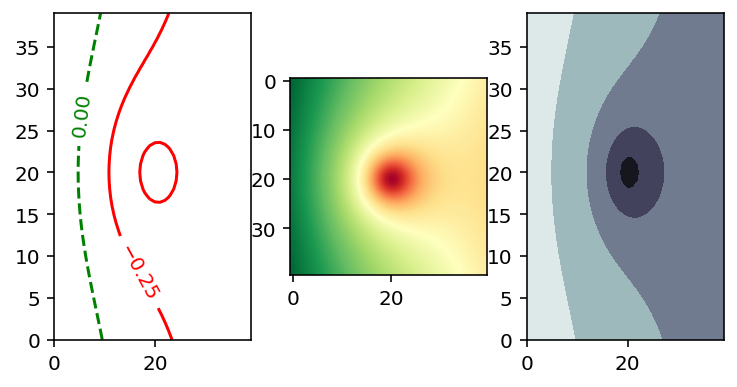

In [94]:
from matplotlib import cm

fig = plt.figure(figsize=(6,3))
ax = fig.subplots(1,3)

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2+1)
e0=0.067
Z = -1/R-e0*X

CS1=ax[0].contour(Z, levels=[-0.75,-0.25,0, 0.25, 0.75], 
           colors=['red','red','green', 'blue', 'blue'],
           linestyles=['solid','solid','dashed','solid','solid',])
ax[0].clabel(CS1, inline=1, fontsize=10);

CS2=ax[1].imshow(Z, interpolation='bilinear', cmap='RdYlGn');
CS3=ax[2].contourf(Z, levels=3, cmap=plt.cm.bone)
#ax[1].clabel(CS, inline=1, fontsize=10);

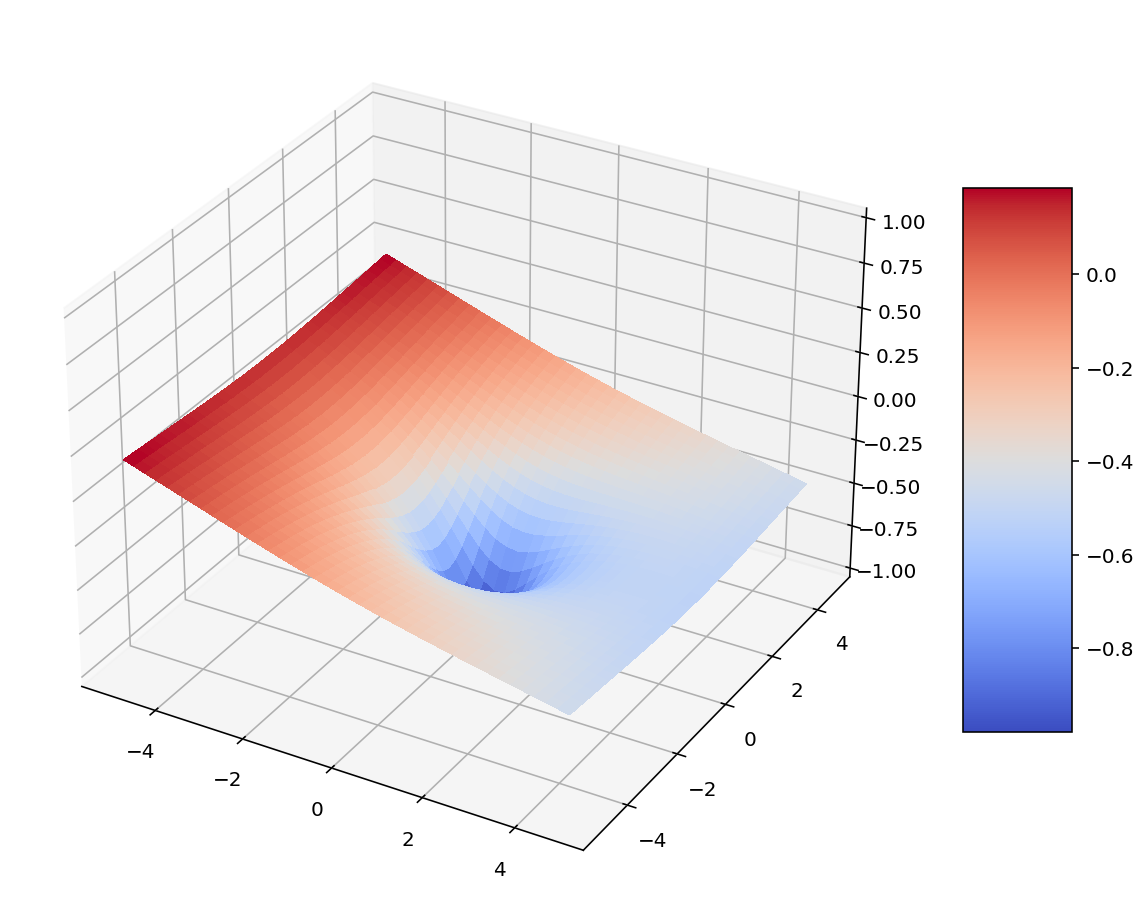

In [91]:
from matplotlib import cm

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2+1)
e0=0.067
Z = -1/R-e0*X


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5);

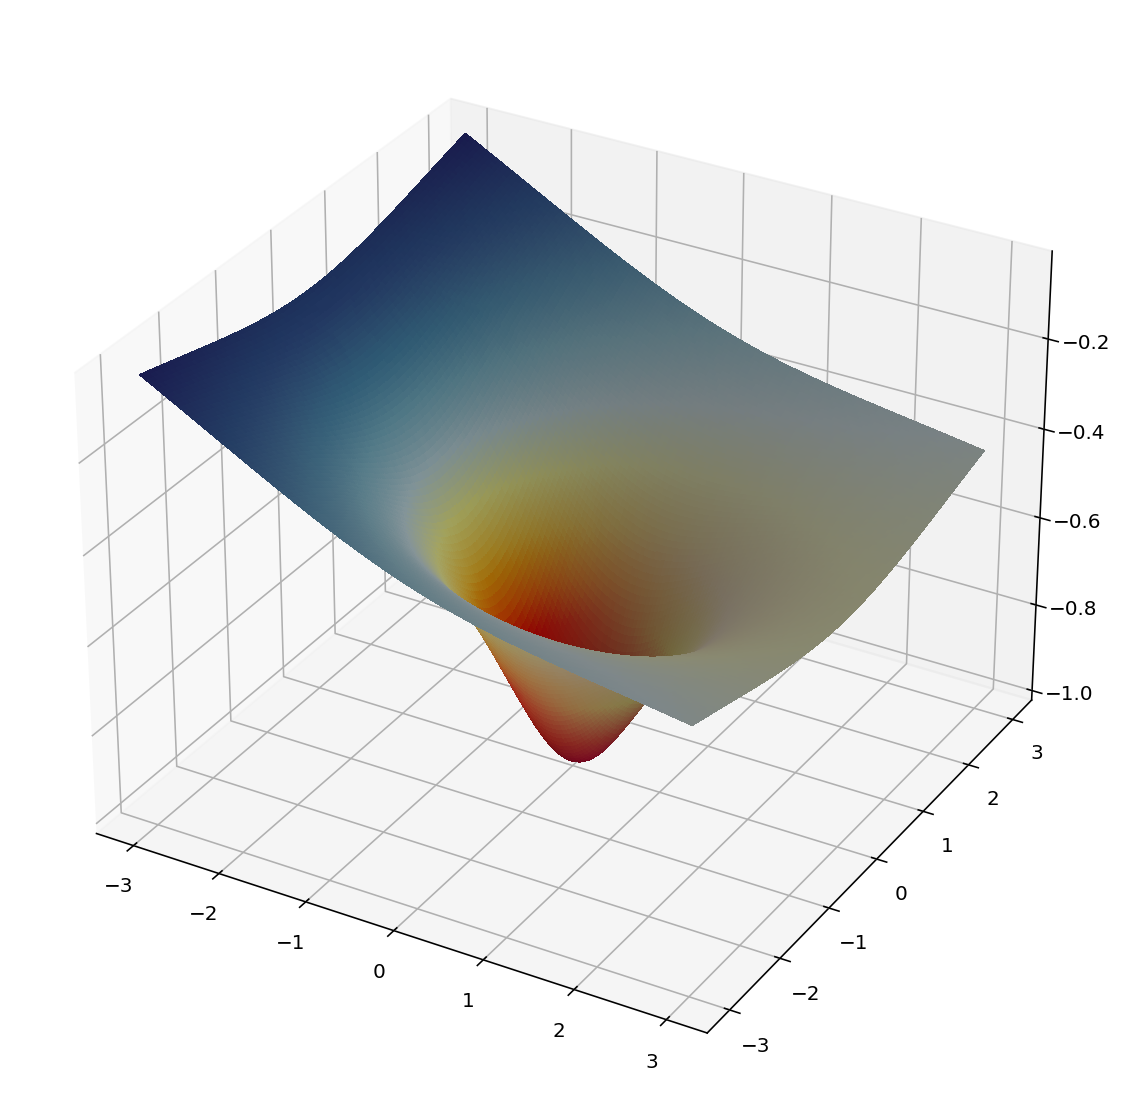

In [83]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


%config InlineBackend.figure_format='retina' 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

x, y = np.mgrid[-3:3:150j,-3:3:150j]
e0=0.067
z =  -1/np.sqrt(x**2 + y**2+1)-e0*x

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Create light source object.
ls = LightSource(azdeg=0, altdeg=65)
# Shade data, creating an rgb array.
rgb = ls.shade(z, plt.cm.RdYlBu)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,
                       antialiased=False, facecolors=rgb)
plt.show()